# Kruskal algorithm

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### Import needed libraries

In [16]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby
import time
from tqdm import tqdm


#### Graph generation function

In [17]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))

    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)

    for (u, v, w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)

    if draw:
        plt.figure(figsize=(10, 6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G, pos, node_color='lightblue',
                    with_labels=True,
                    node_size=500,
                    arrowsize=20,
                    arrows=True)
            labels = nx.get_edge_attributes(G, 'weight')
            nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

        else:
            nx.draw(G, node_color='lightblue',
                    with_labels=True,
                    node_size=500)
    return G


# Kruskal algorithm

#### Task: write a function that will implement Kruskal's algorithm taking as an argument a graph generated using the module provided in the task (function gnp_random_connected_graph). Then compare developed algorithm with the one from networkx

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [18]:
# generate random graph
G_kruskal = gnp_random_connected_graph(10, 1, False, False)


In [19]:
def kruskals_algorithm(graph_edges):
    """
    Kruskal's algorithm impemetation
    """
    sorted_graph = sorted(graph_edges, key=lambda x: x[2].get('weight'))
    connected_nodes_groups = {}
    already_connected_nodes = []
    min_frame = []
    for edge in sorted_graph:
        # checking if one of the nodes are not connected
        if not edge[0] in already_connected_nodes or not edge[1] in already_connected_nodes:
            # checking for both
            if not edge[0] in already_connected_nodes and not edge[1] in already_connected_nodes:
                # connect two nodes with each other
                connected_nodes_groups[edge[0]] = [edge[0], edge[1]]
                connected_nodes_groups[edge[1]] = [edge[0], edge[1]]
            else:
                if not connected_nodes_groups.get(edge[0]):
                    connected_nodes_groups[edge[1]].append(edge[0])
                    connected_nodes_groups[edge[0]
                                           ] = connected_nodes_groups[edge[1]]
                else:
                    connected_nodes_groups[edge[0]].append(edge[1])
                    connected_nodes_groups[edge[1]
                                           ] = connected_nodes_groups[edge[0]]
            min_frame.append(edge)
            already_connected_nodes.append(edge[0])
            already_connected_nodes.append(edge[1])
    for i in sorted_graph:
        if i[0] in connected_nodes_groups[i[0]] and i[1] not in connected_nodes_groups[i[0]]:
            min_frame.append(i)
    return min_frame


#### Here you can see an example of using created Kruskal algorithm. Function returns List[List[int]] (matrix). Full algorithm is implemented in kruskal_algorithm() function. It takes one argument - List[Tuple[int, int, dict]] (graph edges list with information about weight as a dict). Function returns List[Tuple[int, int, dict]] - minimum carcass for input graph

In [20]:
kruskals_algorithm(list(G_kruskal.edges(data=True)))


[(0, 8, {'weight': -5}),
 (1, 9, {'weight': -5}),
 (4, 8, {'weight': -5}),
 (5, 8, {'weight': -4}),
 (1, 7, {'weight': -3}),
 (3, 4, {'weight': -1}),
 (2, 3, {'weight': 2}),
 (6, 9, {'weight': 2}),
 (0, 7, {'weight': -2}),
 (1, 5, {'weight': -1}),
 (2, 7, {'weight': 3}),
 (5, 6, {'weight': 4}),
 (0, 9, {'weight': 5}),
 (0, 2, {'weight': 7}),
 (8, 9, {'weight': 7}),
 (6, 8, {'weight': 8}),
 (1, 2, {'weight': 10}),
 (3, 9, {'weight': 10}),
 (4, 7, {'weight': 10}),
 (5, 7, {'weight': 10}),
 (4, 9, {'weight': 11}),
 (0, 3, {'weight': 13}),
 (0, 6, {'weight': 13}),
 (1, 3, {'weight': 13}),
 (0, 1, {'weight': 14}),
 (2, 6, {'weight': 15}),
 (0, 4, {'weight': 16}),
 (0, 5, {'weight': 16}),
 (3, 6, {'weight': 17}),
 (7, 8, {'weight': 17}),
 (1, 6, {'weight': 18}),
 (1, 8, {'weight': 18}),
 (3, 7, {'weight': 18}),
 (5, 9, {'weight': 18}),
 (6, 7, {'weight': 18}),
 (1, 4, {'weight': 19}),
 (4, 6, {'weight': 19}),
 (2, 9, {'weight': 20})]

## Kruskal algrorithm time measuring

In [25]:
from networkx.algorithms import tree
nodes_kruskal = [10, 20, 50, 100, 200]
NUM_OF_ITERATIONS = 1000


In [28]:
time_taken_imported = 0
kruskal_native_algorithm = []
# For imported kruskal algorithm for 10, 20, 50, 100 and 200 nodes graph
for node in nodes_kruskal:
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        graph_for_imported = gnp_random_connected_graph(node, 0.4, False)

        # measure time while algorithm is working
        start = time.time()  # start
        tree.minimum_spanning_tree(
            graph_for_imported, algorithm="kruskal")  # algorithm is working
        end = time.time()  # end
        time_taken_imported += end - start
    kruskal_native_algorithm.append(time_taken_imported)
    time_taken_imported / NUM_OF_ITERATIONS


100%|██████████| 1000/1000 [01:22<00:00, 12.11it/s]


In [27]:
time_taken_created = 0
kruskal_own_algorithm = []
# For created kruskal algorithm for 10, 20, 50, 100 and 200 nodes graph
for node in nodes_kruskal:
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        geaph_for_created = gnp_random_connected_graph(node, 0.4, False)

        # measure time while algorithm is working
        start = time.time()  # start
        kruskals_algorithm(geaph_for_created.edges(
            data=True))  # algorithm is working
        end = time.time()  # end
        time_taken_created += end - start
    kruskal_own_algorithm.append(time_taken_created)
    time_taken_created / NUM_OF_ITERATIONS


100%|██████████| 1000/1000 [01:50<00:00,  9.05it/s]


#### Here you can see comparing native and created algorithms and a graph that shows diference in time

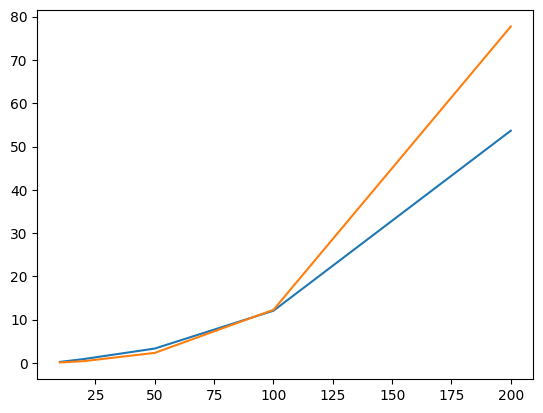

In [29]:
# comparing own and native kruskal algorithms by plotting
plt.plot(nodes_kruskal, kruskal_native_algorithm)
plt.plot(nodes_kruskal, kruskal_own_algorithm)
plt.show()


#### As we see, created algorithm is a little faster than native when graph nodex < 100 and slower than native when nodex > 100. This is because the native algorithm is written with better time complexity (probably other data structures), but has somewhat higher overhead